# Get the Data  
- ../datasets/attribute_set/custom_attr.csv  

In [1]:
from helpers import read_csv_with_dtypes 
import pandas as pd 

data = read_csv_with_dtypes("../datasets/attribute_set/custom_attr.csv")

In [2]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289222 entries, 0 to 289221
Columns: 1001 entries, paths to zippered
dtypes: int8(1000), object(1)
memory usage: 278.0+ MB


In [3]:
data.head() 

,paths,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
LABELS = list(data.columns.values[1:])
LABELS[:5]

['a-line',
 'abstract',
 'abstract chevron',
 'abstract chevron print',
 'abstract diamond']

In [5]:
len(LABELS)

1000

In [6]:
base = "../datasets/big_ds/img-001/" 
base

'../datasets/big_ds/img-001/'

In [7]:
data.paths = data.paths.apply(lambda x: base + x) 
data.head() 

,paths,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,../datasets/big_ds/img-001/img/Sheer_Pleated-F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,../datasets/big_ds/img-001/img/Sheer_Pleated-F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,../datasets/big_ds/img-001/img/Sheer_Pleated-F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,../datasets/big_ds/img-001/img/Sheer_Pleated-F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,../datasets/big_ds/img-001/img/Sheer_Pleated-F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(data.shape)
data = data.drop_duplicates() 
data.shape

(289222, 1001)


(289222, 1001)

## Handle Attrbute Type 

<b>Attribute Type</b>  
- "1" represents texture-related attributes, 
- "2" represents fabric-related attributes, 
- "3" represents shape-related attributes, 
- "4" represents part-related attributes, 
- "5" represents style-related attributes;

In [9]:
attr = pd.read_csv("../datasets/attribute_set/custom_attr_definitions.csv", index_col=0)
attr.head() 

,attribute_name,attribute_type
0,a-line,3
1,abstract,1
2,abstract chevron,1
3,abstract chevron print,1
4,abstract diamond,1


In [10]:
attr.attribute_type.value_counts().index.to_numpy()

array([5, 2, 4, 3, 1], dtype=int64)

### Part Related Attributes "4"

In [11]:
attr[attr.attribute_type == 4].head() 

,attribute_name,attribute_type
22,arrow collar,4
26,asymmetrical hem,4
31,back bow,4
32,back cutout,4
33,back knit,4


In [12]:
attr[attr.attribute_type == 4].shape 

(216, 2)

In [13]:
import numpy as np 

df_category_4 = data.loc[:,np.concatenate([['paths'], attr[attr.attribute_type == 4].iloc[:,0].values])]

In [14]:
df_category_4.shape 

(289222, 217)

In [15]:
import matplotlib.pyplot as plt
import seaborn

def create_pi(df):
    zeros = 0
    ones = 0 
    for i in range(1, df.shape[1]):
        zeros = zeros + df.iloc[:, i].value_counts().to_numpy()[0] 
        ones = ones + df.iloc[:, i].value_counts().to_numpy()[1]  

    
    data_m = [ones, zeros]
    keys = ['Positive', 'Negative']
    
    palette_color = seaborn.color_palette('bright')
    plt.pie(data_m, labels=keys, colors=palette_color, autopct='%.0f%%')

    plt.show()

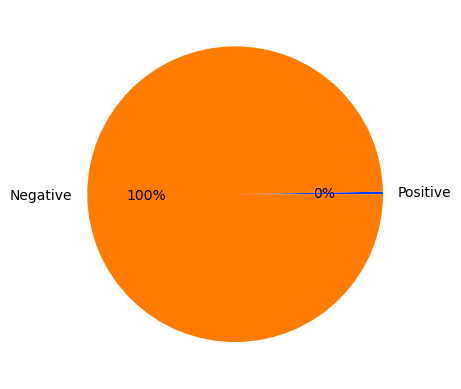

In [16]:
create_pi(df_category_4)

In [17]:
df_category_3 = data.loc[:,np.concatenate([['paths'], attr[attr.attribute_type == 3].iloc[:,0].values])]
df_category_3.shape 

(289222, 181)

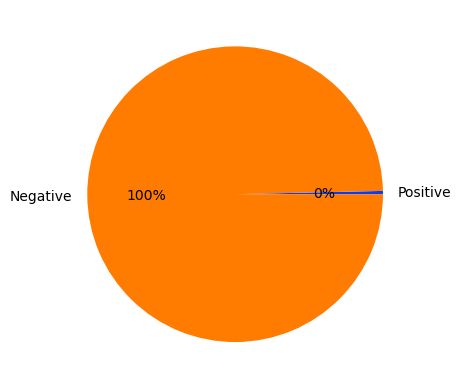

In [18]:
create_pi(df_category_3)

In [19]:
df_category_5 = data.loc[:,np.concatenate([['paths'], attr[attr.attribute_type == 5].iloc[:,0].values])]
df_category_5.shape 

(289222, 231)

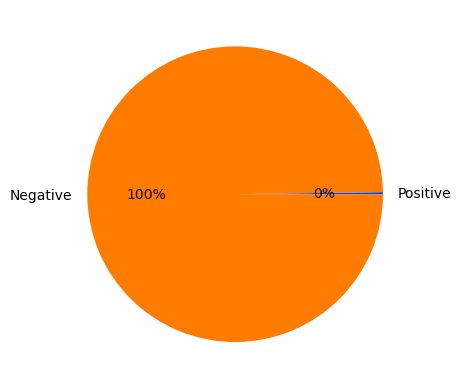

In [20]:
create_pi(df_category_5) 

In [21]:
df_category_5.shape, df_category_3.shape, df_category_4.shape

((289222, 231), (289222, 181), (289222, 217))

# Prepare Data Pipeline by using tf.data 

In [23]:
data = df_category_3

In [24]:
fnames = data.paths.to_numpy()  
fnames[:5]

array(['../datasets/big_ds/img-001/img/Sheer_Pleated-Front_Blouse/img_00000001.jpg',
       '../datasets/big_ds/img-001/img/Sheer_Pleated-Front_Blouse/img_00000002.jpg',
       '../datasets/big_ds/img-001/img/Sheer_Pleated-Front_Blouse/img_00000003.jpg',
       '../datasets/big_ds/img-001/img/Sheer_Pleated-Front_Blouse/img_00000004.jpg',
       '../datasets/big_ds/img-001/img/Sheer_Pleated-Front_Blouse/img_00000005.jpg'],
      dtype=object)

In [26]:
import tensorflow as tf 

ds_size = data.shape[0] 
# number_of_selected_samples = 2000 

filelist_ds = tf.data.Dataset.from_tensor_slices(fnames) 

filelist_ds.cardinality().numpy() 

289222

## Custom tf Helpers 

In [27]:
def get_label(file_path):
    """
        file_path: the file path for the image that you want to select
    """
    labels = data.loc[data.paths == file_path].to_numpy().squeeze()[1:].astype("int64")
    return tf.convert_to_tensor(labels) 

In [32]:
get_label(fnames[100])

<tf.Tensor: shape=(180,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)>

In [33]:
# resize and scale the images so that we can save time in training  
IMG_WIDTH, IMG_HEIGHT = 64, 64 
def decode_img(img):
    """
        img: img is the image 
    """ 
    #color images 
    img = tf.image.decode_jpeg(img, channels=3) 
    img = tf.image.convert_image_dtype(img, tf.float32) 
    img = tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT]) 
    img = img / tf.constant(256, dtype=tf.float32)
    return img

In [34]:
def combine_images_labels(file_path: tf.Tensor): 
    label = get_label(file_path) 
    img = tf.io.read_file(file_path) 
    img = decode_img(img) 
    return img, label 

# Train/Test Split 

In [16]:
train_ratio = 0.80 
ds_train = filelist_ds.take(int(data.shape[0] * train_ratio)) 
ds_test = filelist_ds.skip(int(data.shape[0]  * train_ratio))

In [17]:
BATCH_SIZE = 32 

## Pre-process All the Images 

In [18]:
ds_train = ds_train.map(lambda x: 
                        tf.py_function(func=combine_images_labels, 
                                       inp=[x], # input of the function 
                                       Tout=(tf.float32,tf.int64)),  # return type 
                        num_parallel_calls=tf.data.AUTOTUNE, # parallelizing data extraction 
                        deterministic=False 
                        )

In [19]:
ds_test= ds_test.map(lambda x: tf.py_function(func=combine_images_labels,
          inp=[x], Tout=(tf.float32,tf.int64)),
          num_parallel_calls=tf.data.AUTOTUNE,
          deterministic=False)

### Prepare Data Pipeline 

- **batch**(): Combines consecutive elements of this dataset into batches.
- **cache**(): Caches the elements in this dataset. he first time the dataset is iterated over, its elements will be cached either in the specified file or in memory.Subsequent iterations will use the cached data.
- **prefetch**(): Creates a Dataset that prefetches elements from this dataset. Most dataset input pipelines should end with a call to *prefetch*. This allows later elements to be prepared while the current element is being processed. This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.
 

In [20]:
ds_train_batched = ds_train.batch(BATCH_SIZE).cache().prefetch(tf.data.experimental.AUTOTUNE) 
ds_test_batched = ds_test.batch(BATCH_SIZE).cache().prefetch(tf.data.experimental.AUTOTUNE) 

In [21]:
ds_train_batched.cardinality().numpy() 

50

## Create a Keras CNN model by using Transfer learning

In [22]:
from tensorflow import keras 
base_model = keras.applications.VGG16(
    weights="imagenet", # load weights pre-trained on ImageNet. 
    input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), # VGG16 expects min 32 x 32 
    include_top = False # do not include output layer of the image net vgg 
)
base_model.trainable = False 

In [23]:
nr_of_classes = len(LABELS) 
nr_of_classes

1000

In [24]:
inputs = keras.Input(shape=(IMG_WIDTH,IMG_HEIGHT,3)) 
x = base_model(inputs) 
x = keras.layers.GlobalAveragePooling2D()(x) 

initializer = tf.keras.initializers.GlorotUniform(seed=42) 
activation = tf.keras.activations.sigmoid  

outputs = keras.layers.Dense(nr_of_classes,
                             kernel_initializer=initializer, 
                             activation=activation)(x) 

model = keras.Model(inputs, outputs) 

## Compile and Train the Model 

In [25]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(), # default from_logits=False
              metrics=[keras.metrics.BinaryAccuracy()])

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) 
checkpoint_path = "checkpoints/attribute_prediction_classifier/checkpoint.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         verbose=1)

In [27]:
model.fit(ds_train_batched, 
        validation_data=ds_test_batched, 
        epochs=10,
        callbacks=[early_stopping, checkpoint_callback])

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.2931 - binary_accuracy: 0.9355   
Epoch 1: val_loss improved from inf to 0.10037, saving model to checkpoints/attribute_prediction_classifier\checkpoint.ckpt
50/50 [==============================] - 145784s 2927s/step - loss: 0.2931 - binary_accuracy: 0.9355 - val_loss: 0.1004 - val_binary_accuracy: 0.9960
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.0657 - binary_accuracy: 0.9967
Epoch 2: val_loss improved from 0.10037 to 0.04866, saving model to checkpoints/attribute_prediction_classifier\checkpoint.ckpt
50/50 [==============================] - 46s 901ms/step - loss: 0.0657 - binary_accuracy: 0.9967 - val_loss: 0.0487 - val_binary_accuracy: 0.9960
Epoch 3/10
50/50 [==============================] - ETA: 0s - loss: 0.0386 - binary_accuracy: 0.9967
Epoch 3: val_loss improved from 0.04866 to 0.03535, saving model to checkpoints/attribute_prediction_classifier\checkpoint.ckpt
50/50 [===========

In [28]:
# model.save("../trained_models/model_1")

INFO:tensorflow:Assets written to: ../trained_models/model_1\assets


INFO:tensorflow:Assets written to: ../trained_models/model_1\assets
